<h1>Load in the Classifier and Data</h1>

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits

<h1>Plot a few images to see what they look like</h1>

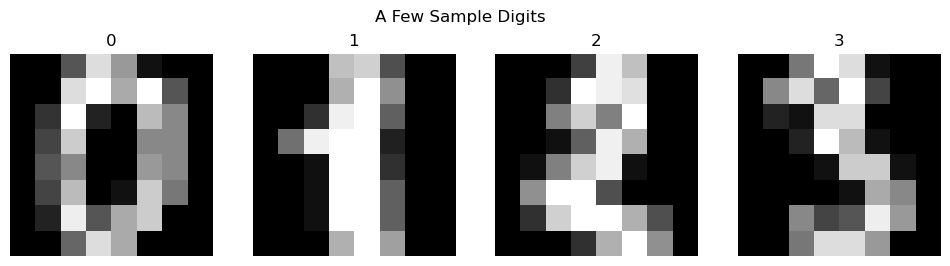

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

digits_X, digits_y = load_digits(return_X_y=True, as_frame=True)

# Plot some of the digits
fig, ax = plt.subplots(1, 4, figsize=(12, 3), dpi=100)
for i in range(4):
    ax[i].imshow(digits_X.iloc[i].values.reshape((8, 8)), cmap='gray')
    ax[i].set_title(digits_y[i])
    ax[i].axis('off')

plt.suptitle('A Few Sample Digits', fontsize=12)
plt.show()

<h1>Load in the Data and Train Test Split it</h1>

In [13]:
from sklearn.model_selection import train_test_split

# Load in the data
digits_X, digits_y = load_digits(return_X_y=True, as_frame=True)

# Train/test split the data
X_train, X_test, y_train, y_test = train_test_split(digits_X, digits_y, test_size=0.2, random_state=1)

<h1>Load in the Classifier</h1>

In [10]:
rf = RandomForestClassifier(random_state=1, bootstrap=True, oob_score=True)

<h1>Train the Classifier</h1>

In [15]:
%%timeit
rf.fit(X_train, y_train)

223 ms ± 679 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


<h1>Get OoB Score</h1>

In [16]:
rf.oob_score_

0.9721642310368824

<h1>Get Accuracy Score</h1>

In [17]:
rf.score(X_test, y_test)

0.9833333333333333

<h1>Confusion Matrix</h1>

Text(0.5, 1.0, 'Confusion Matrix for Test Data')

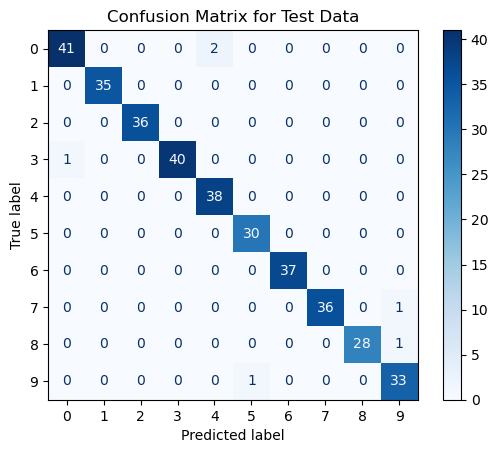

In [25]:
# Get the confusion matrix for the test data
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = rf.predict(X_test)
disp = ConfusionMatrixDisplay.from_estimator(
    rf,
    X_test,
    y_test,
    display_labels=rf.classes_,
    cmap=plt.cm.Blues
)
disp.ax_.set_title('Confusion Matrix for Test Data')
# disp.plot()
